In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

a    1.400080
b   -0.108449
c    0.158514
d    0.267054
e    1.084566
dtype: float64

In [3]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [4]:
print(s[0])
print("\n")
print(s[:3])

-1.15880560043


a   -1.158806
b    0.043475
c   -0.895455
dtype: float64


In [7]:
df = pd.DataFrame(s, columns = ['Coluna 1'])
df

,Coluna 1
a,-1.158806
b,0.043475
c,-0.895455
d,0.584992
e,-2.888643


In [8]:
df['Coluna 1']

a   -1.158806
b    0.043475
c   -0.895455
d    0.584992
e   -2.888643
Name: Coluna 1, dtype: float64

In [9]:
df['Coluna 2'] = df['Coluna 1'] * 4
df

,Coluna 1,Coluna 2
a,-1.158806,-4.635222
b,0.043475,0.173902
c,-0.895455,-3.581820
d,0.584992,2.339967
e,-2.888643,-11.554572


In [10]:
df.sort_values(by = 'Coluna 2')

,Coluna 1,Coluna 2
e,-2.888643,-11.554572
a,-1.158806,-4.635222
c,-0.895455,-3.581820
b,0.043475,0.173902
d,0.584992,2.339967


In [12]:
df[df['Coluna 1'] >= 1]

,Coluna 1,Coluna 2


In [14]:
df.apply(lambda x: min(x) + max(x))
np.mean(df)

Coluna 1   -0.862887
Coluna 2   -3.451549
dtype: float64

In [16]:
table = df.describe()
table

,Coluna 1,Coluna 2
count,5.000000,5.000000
mean,-0.862887,-3.451549
std,1.333244,5.332977
min,-2.888643,-11.554572
25%,-1.158806,-4.635222
50%,-0.895455,-3.581820
75%,0.043475,0.173902
max,0.584992,2.339967


In [17]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [23]:
df = pd.read_csv('c:\data\GlobalTemperatures.csv')
df.head(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = df.ix[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [25]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


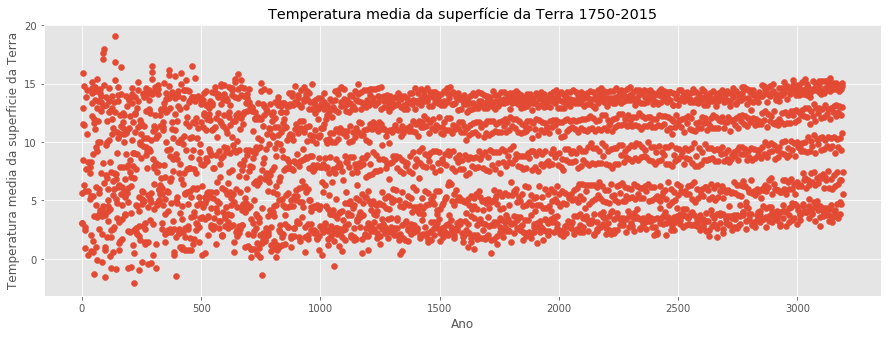

In [27]:
plt.figure(figsize = (15,5))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Temperatura media da superfície da Terra 1750-2015")
plt.xlabel("Ano")
plt.ylabel("Temperatura media da superficie da Terra")
plt.show()

In [28]:
print(type(df['dt'][0]))

<class 'str'>


In [30]:
times = pd.DatetimeIndex(df['dt'])
grouped = df.groupby([times.year]).mean()

<function matplotlib.pyplot.plot>

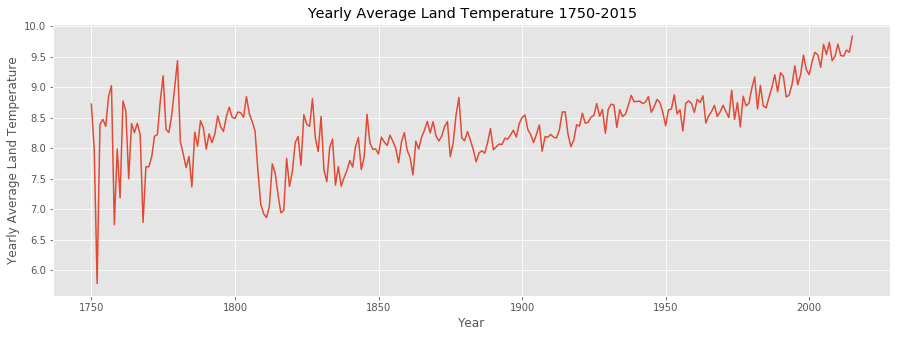

In [35]:
plt.figure(figsize = (15,5))
plt.plot(grouped['LandAverageTemperature'])
plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.plot



In [36]:
grouped.head()

,LandAverageTemperature
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [38]:
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [40]:
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
